## **Carga de bibliotecas y datos**

In [4]:
# 1. Manipulación y Análisis de Datos
import pandas as pd
import numpy as np

# 2. Visualización de Datos
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilos para gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Tamaño de figura por defecto

# 3. Machine Learning (Scikit-learn)

# 3.1. Preprocesamiento de Datos
from sklearn.model_selection import train_test_split # División de datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Escalado de características
# from sklearn.preprocessing import OneHotEncoder # Ya usamos pd.get_dummies, pero es una alternativa

# 3.2. Modelos de Clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier # Otro modelo de boosting
# from xgboost import XGBClassifier # Si se instala XGBoost, descomentar
# from lightgbm import LGBMClassifier # Si se instala LightGBM, descomentar

# 3.3. Evaluación de Modelos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report

# 3.4. Optimización de Hiperparámetros y Pipelines
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # Optimización de hiperparámetros
from sklearn.pipeline import Pipeline # Para construir pipelines de preprocesamiento y modelado

# 4. Manejo del Desbalance de Clases (si es necesario)
from imblearn.over_sampling import SMOTE # Para sobremuestreo sintético (requiere pip install imbalanced-learn)
# from imblearn.pipeline import Pipeline as ImbPipeline # Si usas SMOTE en un pipeline (es diferente al de sklearn)

In [5]:
# Cargaremos nuestro dataFrame
try:
    df_telecom = pd.read_csv("./data/clientes_telecom_limpio.csv")
    print("Archivo 'clientes_telecom_limpio.csv' cargado exitosamente.")
    print("Las primeras 5 filas del DataFrame son:")
    print(df_telecom.head())
    print("\nInformación general del DataFrame:")
    print(df_telecom.info())
except FileNotFoundError:
    print("Error: El archivo 'clientes_telecom_limpio.csv' no se encontró. Asegúrate de que esté en el mismo directorio.")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")

Archivo 'clientes_telecom_limpio.csv' cargado exitosamente.
Las primeras 5 filas del DataFrame son:
   Cliente_ID Evasion  Genero  Mayor_Edad Tiene_Pareja Tiene_Dependientes  \
0  0002-Orfbo      No  Female           0          Yes                Yes   
1  0003-Mknfe      No    Male           0           No                 No   
2  0004-Tlhlj     Yes    Male           0           No                 No   
3  0011-Igkff     Yes    Male           1          Yes                 No   
4  0013-Exchz     Yes  Female           1          Yes                 No   

   Meses_Contrato Servicio_Telefonia MultiServicios Servicio_Internet  ...  \
0               9                Yes             No               Dsl  ...   
1               9                Yes            Yes               Dsl  ...   
2               4                Yes             No       Fiber Optic  ...   
3              13                Yes             No       Fiber Optic  ...   
4               3                Yes           

In [6]:
# Eliminar columnas que no aportan valor
columnasEliminadas = ['Cliente_ID'] 

# Verificar si las columnas existen antes de eliminarlas
columnas_existentes = [col for col in columnasEliminadas if col in df_telecom.columns]

if columnas_existentes:
    df_telecom = df_telecom.drop(columns=columnas_existentes)
    print(f"Columnas eliminadas exitosamente: {columnas_existentes}")
    print("\nLas primeras 5 filas del DataFrame después de eliminar columnas son:")
    print(df_telecom.head())
    print("\nInformación general del DataFrame después de eliminar columnas:")
    print(df_telecom.info())
else:
    print("No se encontraron las columnas especificadas para eliminar.")

Columnas eliminadas exitosamente: ['Cliente_ID']

Las primeras 5 filas del DataFrame después de eliminar columnas son:
  Evasion  Genero  Mayor_Edad Tiene_Pareja Tiene_Dependientes  Meses_Contrato  \
0      No  Female           0          Yes                Yes               9   
1      No    Male           0           No                 No               9   
2     Yes    Male           0           No                 No               4   
3     Yes    Male           1          Yes                 No              13   
4     Yes  Female           1          Yes                 No               3   

  Servicio_Telefonia MultiServicios Servicio_Internet Seguridad_Online  ...  \
0                Yes             No               Dsl               No  ...   
1                Yes            Yes               Dsl               No  ...   
2                Yes             No       Fiber Optic               No  ...   
3                Yes             No       Fiber Optic               No  ...   

In [7]:
# Seleccionar columnas de tipo 'object' (que suelen ser categóricas en pandas)
columnas_categoricas = df_telecom.select_dtypes(include=['object']).columns

# Excluir la columna 'Evasion' si es la variable objetivo y no necesita one-hot encoding
# Si 'Evasion' es la variable objetivo y ya está en 'Yes'/'No', la convertiremos a 0/1 después
if 'Evasion' in columnas_categoricas:
    columnas_categoricas = columnas_categoricas.drop('Evasion')
    # También convertimos 'Evasion' a binario (0 y 1) aquí para compatibilidad con modelos
    df_telecom['Evasion'] = df_telecom['Evasion'].map({'No': 0, 'Yes': 1})
    print("Columna 'Evasion' convertida a 0 y 1.")


print(f"Columnas categóricas a codificar: {list(columnas_categoricas)}")

# Aplicar One-Hot Encoding a las columnas categóricas seleccionadas
df_telecom_encoded = pd.get_dummies(df_telecom, columns=columnas_categoricas, dtype=int)


print("\nLas primeras 5 filas del DataFrame después de la codificación One-Hot son:")
print(df_telecom_encoded.head())

print("\nInformación general del DataFrame después de la codificación:")
print(df_telecom_encoded.info())

# Verificar que no queden columnas de tipo 'object' (excepto si hay alguna que se haya omitido intencionalmente)
print(f"\nColumnas restantes de tipo 'object': {df_telecom_encoded.select_dtypes(include=['object']).columns.tolist()}")

Columna 'Evasion' convertida a 0 y 1.
Columnas categóricas a codificar: ['Genero', 'Tiene_Pareja', 'Tiene_Dependientes', 'Servicio_Telefonia', 'MultiServicios', 'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Tipo_Contrato', 'Factura_Sin_Papel', 'Metodo_Pago']

Las primeras 5 filas del DataFrame después de la codificación One-Hot son:
   Evasion  Mayor_Edad  Meses_Contrato  Factura_Mensual  Total_Facturado  \
0        0           0               9             65.6           593.30   
1        0           0               9             59.9           542.40   
2        1           0               4             73.9           280.85   
3        1           1              13             98.0          1237.85   
4        1           1               3             83.9           267.40   

   Cuentas_Diarias  Genero_Female  Genero_Male  Tiene_Pareja_No  \
0         2.186667              1         

In [8]:
# Calcular la proporción de clientes que cancelaron vs. los que permanecieron activos
proporcion_evasion = df_telecom_encoded['Evasion'].value_counts()
porcentaje_evasion = df_telecom_encoded['Evasion'].value_counts(normalize=True) * 100

print("Conteo de clientes por estado de evasión (0: Activo, 1: Evasión):")
print(proporcion_evasion)

print("\nPorcentaje de clientes por estado de evasión:")
print(porcentaje_evasion)

# Evaluar si existe un desbalance
if porcentaje_evasion[1] < 30 and porcentaje_evasion[0] > 70: # Umbral común para considerar desbalance
    print("\n¡Advertencia! Se detecta un desbalance significativo en las clases (Evasión vs. Activos).")
    print("Esto deberá ser considerado durante el entrenamiento y evaluación de los modelos (ej. usando SMOTE, pesos de clase, o métricas como F1-score/AUC-ROC).")
else:
    print("\nLas clases parecen estar razonablemente balanceadas.")

Conteo de clientes por estado de evasión (0: Activo, 1: Evasión):
Evasion
0    5174
1    1869
Name: count, dtype: int64

Porcentaje de clientes por estado de evasión:
Evasion
0    73.463013
1    26.536987
Name: proportion, dtype: float64

¡Advertencia! Se detecta un desbalance significativo en las clases (Evasión vs. Activos).
Esto deberá ser considerado durante el entrenamiento y evaluación de los modelos (ej. usando SMOTE, pesos de clase, o métricas como F1-score/AUC-ROC).


In [9]:
# Separar características (X) y variable objetivo (y) de df_telecom_encoded

X = df_telecom_encoded.drop('Evasion', axis=1)
y = df_telecom_encoded['Evasion']

# Si hay NaNs, StandardScaler lanzará un error.
print("Número de valores nulos por columna antes de la estandarización (verificación):")
nans_in_X = X.isnull().sum()[X.isnull().sum() > 0]
if not nans_in_X.empty:
    print(nans_in_X)
    print("\n¡Advertencia! Se detectaron valores nulos en X. StandardScaler no puede manejarlos. Por favor, considera imputarlos o eliminarlos.")
else:
    print("No se encontraron valores nulos en X. ¡Perfecto para estandarizar!")

# -----------------------------------------------------------------------------------------


print("\nColumnas numéricas antes de la estandarización:")
print(X.select_dtypes(include=['number']).columns.tolist())


# Identificar columnas numéricas a estandarizar
# Las columnas resultantes de One-Hot Encoding (que son binarias 0/1) no necesitan estandarización.
# Solo las columnas que son verdaderamente continuas (o tienen más de 2 valores únicos) deben ser estandarizadas.

numeric_cols = X.select_dtypes(include=np.number).columns.tolist()

# Filtrar las columnas que tienen más de 2 valores únicos, ya que las binarias (0 o 1)
# y las resultantes de one-hot encoding (que solo tendrán 0s y 1s) no necesitan escalado.
cols_to_standardize = [col for col in numeric_cols if X[col].nunique() > 2]

print(f"\nColumnas a estandarizar: {cols_to_standardize}")

# Inicializar el StandardScaler
scaler = StandardScaler()

# Aplicar estandarización a las columnas seleccionadas
X_scaled = X.copy() # Hacemos una copia para no modificar el DataFrame original directamente
if cols_to_standardize: # Solo aplica si hay columnas para estandarizar
    X_scaled[cols_to_standardize] = scaler.fit_transform(X[cols_to_standardize])
    print("\nLas primeras 5 filas del DataFrame X después de la estandarización son:")
    print(X_scaled.head())

    print("\nEstadísticas descriptivas de las columnas estandarizadas (media cercana a 0, std cercana a 1):")
    print(X_scaled[cols_to_standardize].describe().loc[['mean', 'std']])
else:
    print("\nNo se encontraron columnas numéricas con más de 2 valores únicos para estandarizar. X_scaled es una copia de X.")
    print(X_scaled.head())


print("\n¡Datos estandarizados exitosamente (si aplicable)!")

Número de valores nulos por columna antes de la estandarización (verificación):
Total_Facturado    11
dtype: int64

¡Advertencia! Se detectaron valores nulos en X. StandardScaler no puede manejarlos. Por favor, considera imputarlos o eliminarlos.

Columnas numéricas antes de la estandarización:
['Mayor_Edad', 'Meses_Contrato', 'Factura_Mensual', 'Total_Facturado', 'Cuentas_Diarias', 'Genero_Female', 'Genero_Male', 'Tiene_Pareja_No', 'Tiene_Pareja_Yes', 'Tiene_Dependientes_No', 'Tiene_Dependientes_Yes', 'Servicio_Telefonia_No', 'Servicio_Telefonia_Yes', 'MultiServicios_No', 'MultiServicios_No Phone Service', 'MultiServicios_Yes', 'Servicio_Internet_Dsl', 'Servicio_Internet_Fiber Optic', 'Servicio_Internet_No', 'Seguridad_Online_No', 'Seguridad_Online_No Internet Service', 'Seguridad_Online_Yes', 'Respaldo_Online_No', 'Respaldo_Online_No Internet Service', 'Respaldo_Online_Yes', 'Proteccion_Dispositivo_No', 'Proteccion_Dispositivo_No Internet Service', 'Proteccion_Dispositivo_Yes', 'Sopo

Calculando la matriz de correlación completa...

Las top 15 variables más correlacionadas con 'Evasion' (en valor absoluto):
Tipo_Contrato_Month-To-Month                  0.405103
Meses_Contrato                                0.352229
Seguridad_Online_No                           0.342637
Soporte_Tecnico_No                            0.337281
Servicio_Internet_Fiber Optic                 0.308020
Tipo_Contrato_Two Year                        0.302253
Metodo_Pago_Electronic Check                  0.301919
Respaldo_Online_No                            0.268005
Proteccion_Dispositivo_No                     0.252481
Streaming_TV_No Internet Service              0.227890
Streaming_Peliculas_No Internet Service       0.227890
Servicio_Internet_No                          0.227890
Proteccion_Dispositivo_No Internet Service    0.227890
Soporte_Tecnico_No Internet Service           0.227890
Seguridad_Online_No Internet Service          0.227890
Name: Evasion, dtype: float64

Calculando la matri

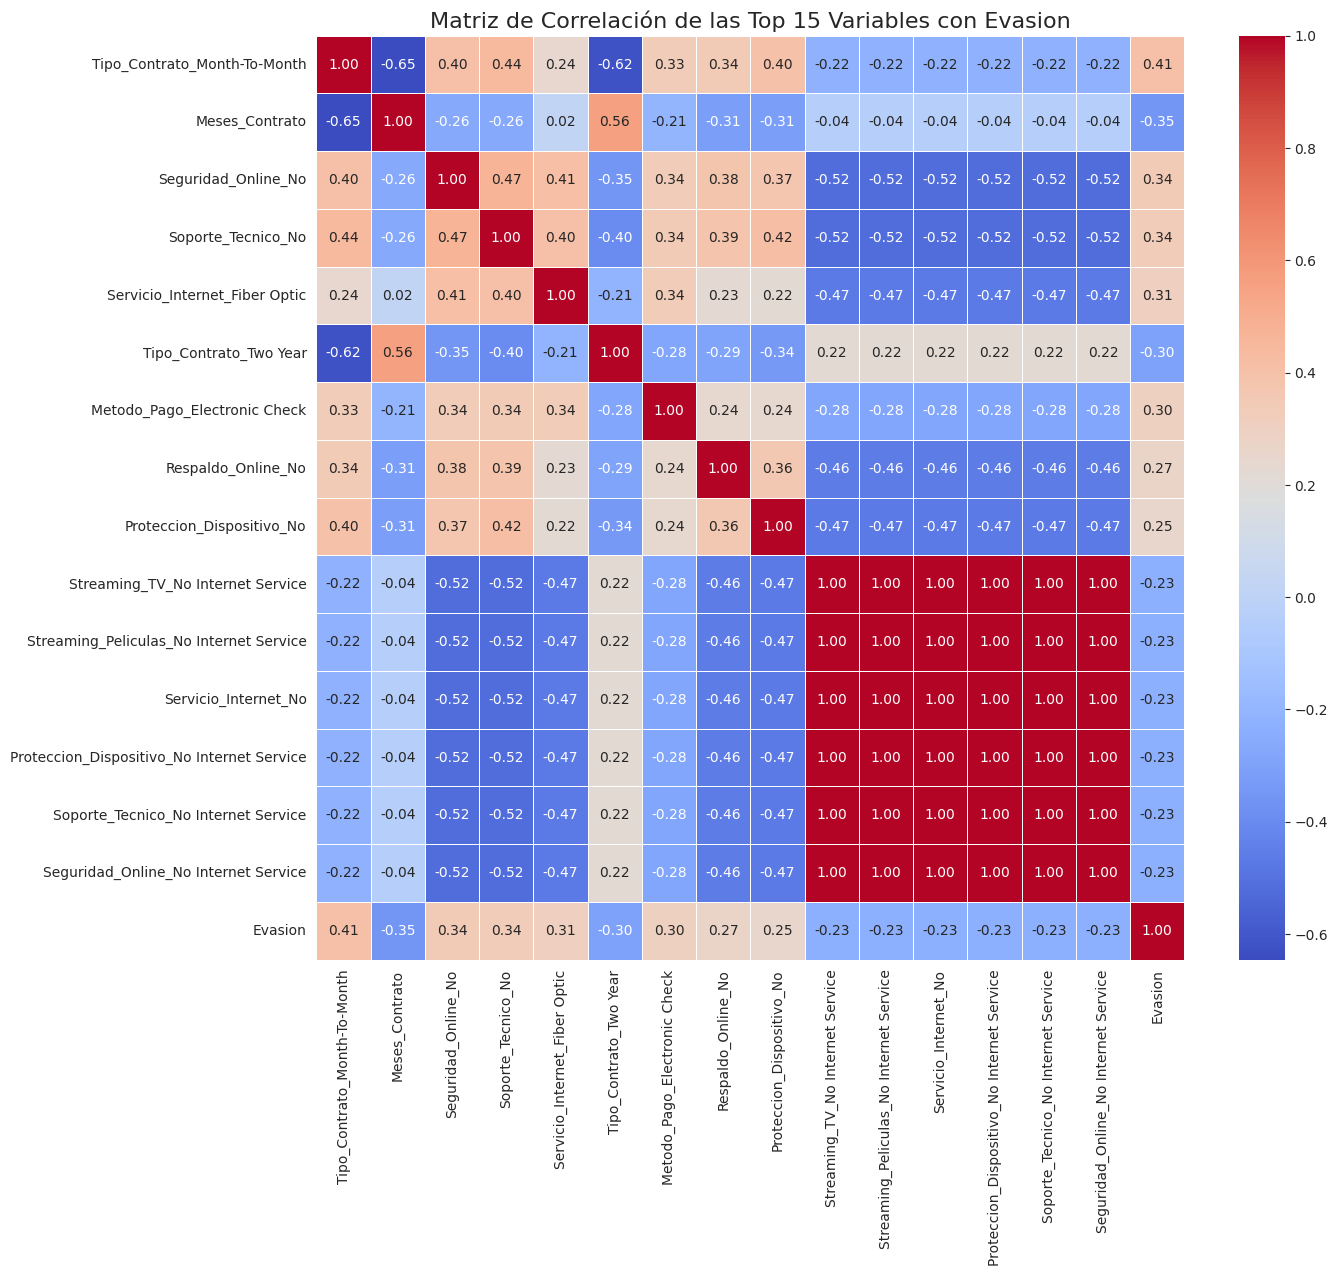


Análisis de correlación ajustado completado. Se ha visualizado la correlación de las 15 variables más influyentes con 'Evasion'.


In [ ]:
# Uniremos X_scaled y y para calcular la correlación completa
df_correlation = X_scaled.copy()
df_correlation['Evasion'] = y.values

print("Calculando la matriz de correlación completa...")
correlation_matrix = df_correlation.corr()

# Obtendremos la correlación de todas las variables con 'Evasion' y las ordenaremos por valor absoluto
correlation_with_churn = correlation_matrix['Evasion'].drop('Evasion').abs().sort_values(ascending=False)

# Seleccionamos un top 15 de las variables más correlacionadas
top_n = 15
top_15_features = correlation_with_churn.head(top_n).index.tolist()

print(f"\nLas top {top_n} variables más correlacionadas con 'Evasion' (en valor absoluto):")
print(correlation_with_churn.head(top_n))

# Creaamos un nuevo DataFrame solo con estas 15 variables y la columna 'Evasion'
df_top_features_correlation = df_correlation[top_15_features + ['Evasion']]

print(f"\nCalculando la matriz de correlación para las top {top_n} variables seleccionadas...")
correlation_matrix_top_features = df_top_features_correlation.corr()

# Visualizamos la matriz de correlación con las 15 variables mas correlacionadas
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix_top_features, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Matriz de Correlación de las Top {top_n} Variables con Evasion', fontsize=16)
plt.show()

print("\nAnálisis de correlación ajustado completado. Se ha visualizado la correlación de las 15 variables más influyentes con 'Evasion'.")

/tmp/ipykernel_9927/3762251916.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion_Label', y='Meses_Contrato', data=df_correlation, palette='viridis')


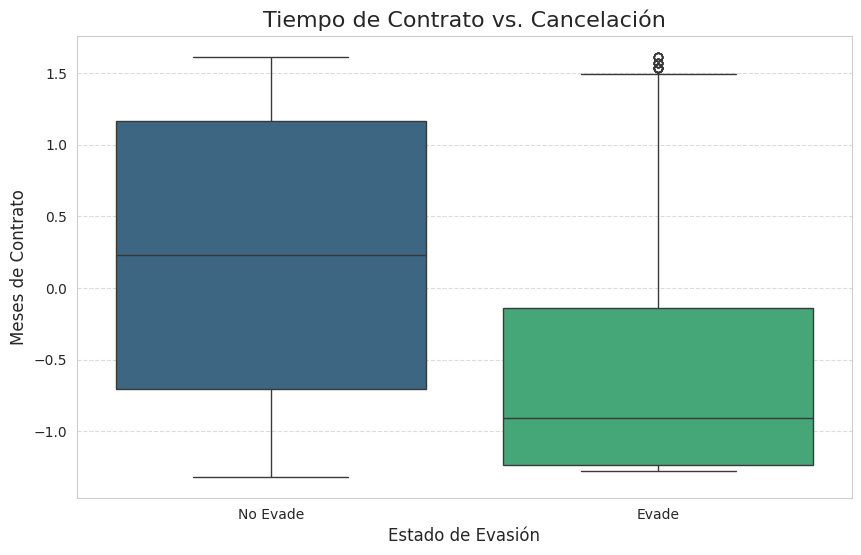


Interpretación para 'Tiempo de Contrato vs. Cancelación':
Observa la mediana (línea central en la caja) y la dispersión (tamaño de la caja) de los meses de contrato para los clientes que cancelan (Churn) y los que no (No Churn).
Si la mediana para 'Churn' es significativamente menor, podría indicar que los clientes con contratos más cortos son más propensos a cancelar.


/tmp/ipykernel_9927/3762251916.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion_Label', y='Total_Facturado', data=df_correlation, palette='plasma')


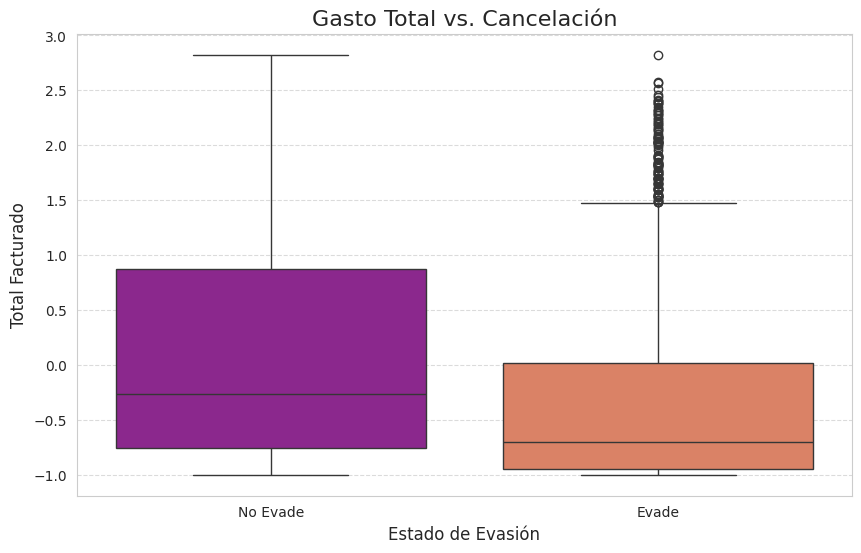


Interpretación para 'Gasto Total vs. Cancelación':
De manera similar, compara la distribución del gasto total. Si los clientes que cancelan tienen un gasto total consistentemente menor o muy diferente, es un factor a considerar.
A veces, los clientes con muy bajo gasto o con un alto gasto recién iniciado son más propensos a cancelar.

Análisis dirigido completado para 'Tiempo de Contrato' y 'Gasto Total'.


In [16]:
df_correlation['Evasion_Label'] = df_correlation['Evasion'].map({0: 'No Evade', 1: 'Evade'})

# --- Análisis: Tiempo de Contrato vs. Cancelación ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='Evasion_Label', y='Meses_Contrato', data=df_correlation, palette='viridis')
plt.title('Tiempo de Contrato vs. Cancelación', fontsize=16)
plt.xlabel('Estado de Evasión', fontsize=12)
plt.ylabel('Meses de Contrato', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nInterpretación para 'Tiempo de Contrato vs. Cancelación':")
print("Observa la mediana (línea central en la caja) y la dispersión (tamaño de la caja) de los meses de contrato para los clientes que cancelan (Churn) y los que no (No Churn).")
print("Si la mediana para 'Churn' es significativamente menor, podría indicar que los clientes con contratos más cortos son más propensos a cancelar.")


# --- Análisis: Gasto Total vs. Cancelación ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='Evasion_Label', y='Total_Facturado', data=df_correlation, palette='plasma')
plt.title('Gasto Total vs. Cancelación', fontsize=16)
plt.xlabel('Estado de Evasión', fontsize=12)
plt.ylabel('Total Facturado', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nInterpretación para 'Gasto Total vs. Cancelación':")
print("De manera similar, compara la distribución del gasto total. Si los clientes que cancelan tienen un gasto total consistentemente menor o muy diferente, es un factor a considerar.")
print("A veces, los clientes con muy bajo gasto o con un alto gasto recién iniciado son más propensos a cancelar.")


print("\nAnálisis dirigido completado para 'Tiempo de Contrato' y 'Gasto Total'.")